# CAR PRICE PREDICTION USING LINEAR & LASSO REGRESSION MODEL

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor 
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\PC\Desktop\MACHINE LEARNING\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.shape

(301, 9)

Finding catogorical data

In [12]:
df['Fuel_Type'].value_counts ()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df['Seller_Type'].value_counts ()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
df['Transmission'].value_counts ()


Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [16]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
            'Seller_Type':{'Dealer':0,'Individual':1},
            'Transmission':{'Manual':0,'Automatic':0}},inplace=True)

In [17]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting data into training and test

In [19]:
X = df.drop(columns=['Car_Name','Selling_Price'],axis=1)

Y =df['Selling_Price']

Training Model

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

1. Linear Regression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [25]:
#Accuracy on training data
Training_data_prediction = model.predict (X_train)

# R squared error
score_1 = metrics.r2_score(Y_train,Training_data_prediction)

# mean absolute value
score_2= metrics.mean_absolute_error(Y_train,Training_data_prediction)

print('R Squared R :', score_1)
print('Mean Absolute Error :', score_2)

R Squared R : 0.8719637171352985
Mean Absolute Error : 1.2354085514366413


Visualizing Actual data vs Predicted data

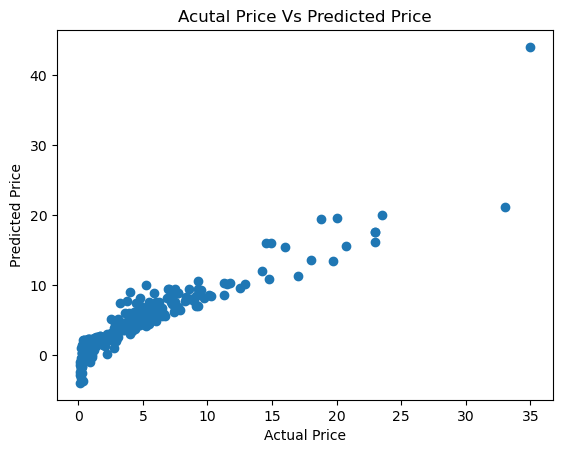

In [26]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Price Vs Predicted Price')
plt.show()


In [27]:
#Accuracy on test data
Test_data_prediction = model.predict (X_test)

# R squared error
score_1 = metrics.r2_score(Y_test,Test_data_prediction)

# mean absolute value
score_2= metrics.mean_absolute_error(Y_test,Test_data_prediction)

print('R Squared R :', score_1)
print('Mean Absolute Error :', score_2)

R Squared R : 0.8340585167698437
Mean Absolute Error : 1.1637657138282


Visualization

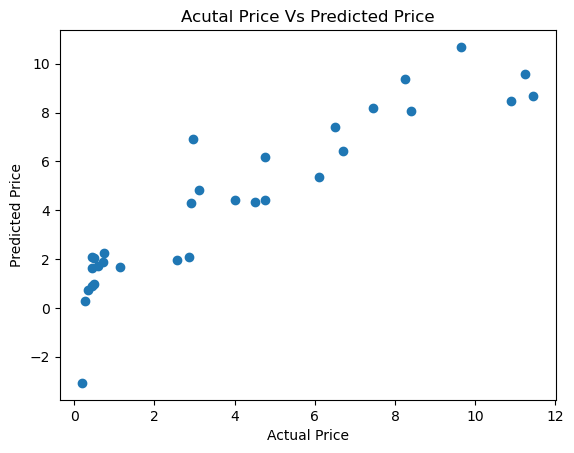

In [28]:
plt.scatter(Y_test,Test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Price Vs Predicted Price')
plt.show()


2. Lasso Regression

In [32]:
model = Lasso()

In [33]:
model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [34]:
#Accuracy on training data
Training_data_prediction = model.predict (X_train)

# R squared error
score_1 = metrics.r2_score(Y_train,Training_data_prediction)

# mean absolute value
score_2= metrics.mean_absolute_error(Y_train,Training_data_prediction)

print('R Squared R :', score_1)
print('Mean Absolute Error :', score_2)

R Squared R : 0.8427856123435794
Mean Absolute Error : 1.2863097696916528


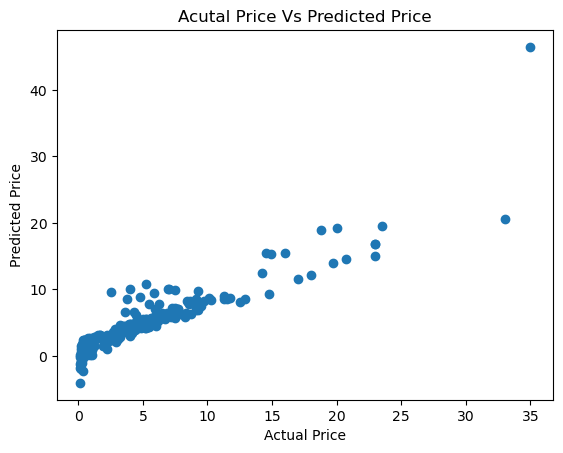

In [36]:
plt.scatter(Y_train,Training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Price Vs Predicted Price')
plt.show()



In [37]:
#Accuracy on test data
Test_data_prediction = model.predict (X_test)

# R squared error
score_1 = metrics.r2_score(Y_test,Test_data_prediction)

# mean absolute value
score_2= metrics.mean_absolute_error(Y_test,Test_data_prediction)

print('R Squared R :', score_1)
print('Mean Absolute Error :', score_2)

R Squared R : 0.8709167941173195
Mean Absolute Error : 1.0507413774170433


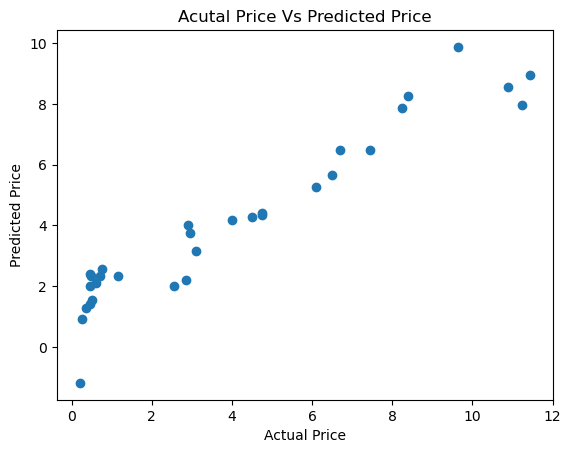

In [48]:
plt.scatter(Y_test,Test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Price Vs Predicted Price')
plt.show()
